In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# from datetime import datetime
# dateparse=lambda x:datetime.strptime(x, '%m/%d/%Y')
os.chdir(r"C:\Users\Irina\Documents\BOOT CAMP\Projects\Team3_Project_1")
print(os.getcwd())
ufo = pd.read_csv("scrubbed.csv",dtype = {"duration (seconds)": str, "latitude": str})
# ufo_df = pd.read_csv("ufo_sighting_data.csv",dtype = {"length_of_encounter_seconds": str, "latitude": str})
ufo

C:\Users\Irina\Documents\BOOT CAMP\Projects\Team3_Project_1


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [55]:
#Group the data by shape and count
ufo_shape=ufo.groupby(["shape"]) ["shape"].count()
ufo_shape=pd.DataFrame(ufo_shape)
ufo_shape=ufo_shape.rename(columns={"shape":"Count"})
#Sort the data by descending order
ufo_shape=ufo_shape.sort_values("Count")
ufo_shape

,Count
shape,
changed,1
hexagon,1
flare,1
dome,1
pyramid,1
crescent,2
round,2
delta,7
cross,233


Text(0.5, 1.0, 'UFO Sightings by Shape')

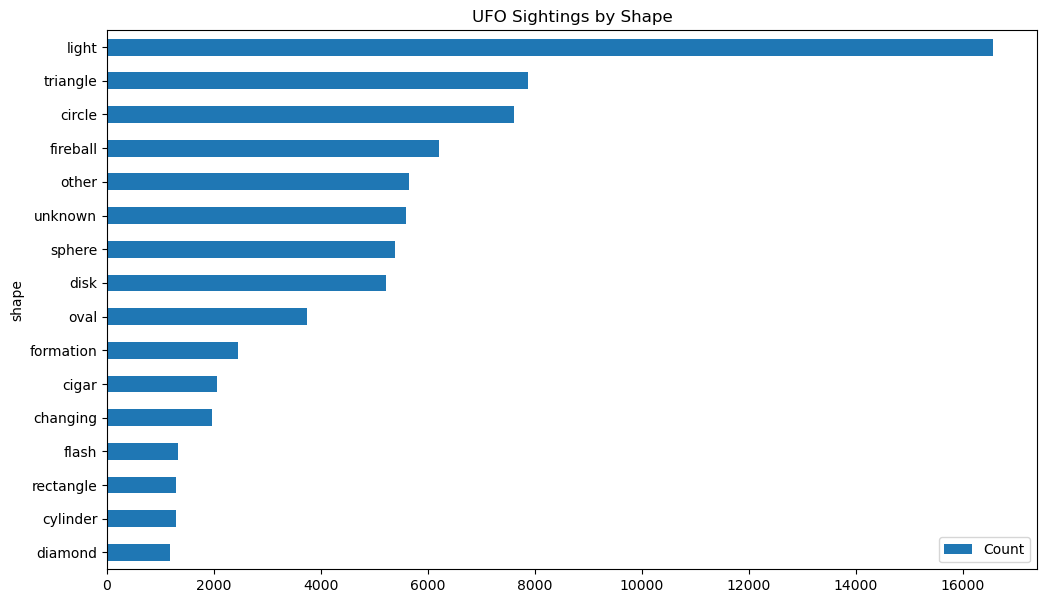

In [56]:
ufo_shape_for_bar=ufo_shape.loc[ufo_shape["Count"]>=1000]

ufo_shape_for_bar_plot=ufo_shape_for_bar.plot(kind="barh",figsize=(12,7))
plt.title("UFO Sightings by Shape")



In [57]:
#Function to count shapes by countries and create a df
def shape(x,y,z):
    y=ufo.loc[ufo["shape"]==x,:]
    y=y.groupby("country")["shape"].count()
    y=pd.DataFrame(y)
    y=y.rename(columns={"shape":z})
    return y

In [58]:
#1.Create triangles df
triangle_df=shape("triangle","triangle", "triangle")
triangle_df
#2.Create light df
light_df=shape("light","light","light")
print(light_df)
#3.Create circle df
circle_df=shape("circle","circle","circle")
circle_df
#4.Create fireball df
fireball_df=shape("fireball","fireball","fireball")
#5.Create sphere df
sphere_df = shape("sphere","sphere", "sphere")
#6.Create disk df
disk_df = shape("disk","disk","disk")
#7.Create oval df
oval_df = shape("oval","oval", "oval")
#8.Create formation df
formation_df = shape("formation","formation", "formation")
#9.Create cigar df
cigar_df = shape("cigar","cigar", "cigar")


         light
country       
au         119
ca         655
de          20
gb         361
us       13473


In [59]:
#Import reduce
from functools import reduce
#Create a list of dataframes
shape_list= [light_df,triangle_df,fireball_df, sphere_df, disk_df, oval_df, formation_df, cigar_df]
#Merge the dfs on the list
shape_merge = reduce(lambda left, right:     
                     pd.merge(left , right,
                              on = ["country"],
                              how = "outer"),
                     shape_list)
print(shape_merge)


         light  triangle  fireball  sphere  disk  oval  formation  cigar
country                                                                 
au         119        43        34      15    50    30         20     15
ca         655       268       218     205   198   130         98     74
de          20         9         9       7     6     7          3      3
gb         361       169       117     158   102    86         60     60
us       13473      6549      5148    4347  4121  3032       1990   1643


In [60]:
#Add a column with the total of all sightings to calculate % for the top 4 shape
total=[527, 2955, 103,1855,63561]
shape_merge["total"]=total
shape_merge

,light,triangle,fireball,sphere,disk,oval,formation,cigar,total
country,,,,,,,,,
au,119,43,34,15,50,30,20,15,527
ca,655,268,218,205,198,130,98,74,2955
de,20,9,9,7,6,7,3,3,103
gb,361,169,117,158,102,86,60,60,1855
us,13473,6549,5148,4347,4121,3032,1990,1643,63561


In [61]:
#Calculate % of sightings of the top 8 shapes and place the new values in the columns
cols=["light","triangle","fireball", "sphere", "disk", "oval", "formation", "cigar"]

shape_merge1=shape_merge[cols]=round((shape_merge[cols]*100).div(shape_merge['total'], axis=0),0)
shape_merge1

,light,triangle,fireball,sphere,disk,oval,formation,cigar
country,,,,,,,,
au,23.0,8.0,6.0,3.0,9.0,6.0,4.0,3.0
ca,22.0,9.0,7.0,7.0,7.0,4.0,3.0,3.0
de,19.0,9.0,9.0,7.0,6.0,7.0,3.0,3.0
gb,19.0,9.0,6.0,9.0,5.0,5.0,3.0,3.0
us,21.0,10.0,8.0,7.0,6.0,5.0,3.0,3.0


In [62]:
#Create a new df with the data for the top 4 shapes and the countries with the highest % of sightings with these shapes compared to the others shapes.
max_shape_by_country=pd.DataFrame({"UFO_shape":["light","triangle","fireball", "sphere"],
                                   "country":["Australia", "US", "Germany", "Great Britain"],
                                   "percentage":[23, 10,9, 9]})
               
max_shape_by_country

,UFO_shape,country,percentage
0,light,Australia,23
1,triangle,US,10
2,fireball,Germany,9
3,sphere,Great Britain,9


Text(0, 0.5, 'Percentage')

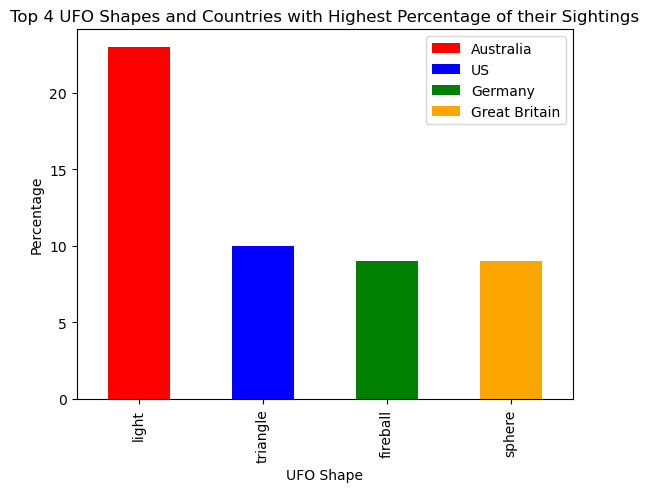

In [63]:
#Import Patch
from matplotlib.patches import Patch
#Assign colors and create a dictionary
colours = {"Australia": "red", "US": "blue", "Germany":"green", "Great Britain":"orange"}
#Plot the data and add legend
max_shape_by_country.plot(x='UFO_shape', y='percentage',
        kind="bar", color=max_shape_by_country['country'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['Australia']),
        Patch(facecolor=colours['US']),
        Patch(facecolor=colours['Germany']),
        Patch(facecolor=colours['Great Britain'])
    ], ["Australia", "US", "Germany", "Great Britain"]
)
#Add title and labels
plt.title("Top 4 UFO Shapes and Countries with Highest Percentage of their Sightings")
plt.xlabel("UFO Shape")
plt.ylabel("Percentage")

In [64]:
#Create a df only for US
shape_usa=ufo.loc[ufo["country"]=="us",:]
#Define a function to count shapes by states and create a df
def shape_us(x,y,z):
    y=shape_usa.loc[shape_usa["shape"]==x,:]
    y=y.groupby("state")["shape"].count()
    y=pd.DataFrame(y)
    y=y.rename(columns={"shape":z})
    return y

In [65]:
#Create a triangle df for US
triangle_us=shape_us("triangle","triangle", "triangle")
#2.Create light df
light_us=shape_us("light","light","light")
#3.Create circle df
circle_us=shape_us("circle","circle","circle")
circle_us
#4.Create fireball df
fireball_us=shape_us("fireball","fireball","fireball")
#5.Create sphere df
sphere_us = shape_us("sphere","sphere", "sphere")
#6.Create disk df
disk_us = shape_us("disk","disk","disk")
#7.Create oval df
oval_us = shape_us("oval","oval", "oval")
#8.Create formation df
formation_us = shape_us("formation","formation", "formation")
#9.Create cigar df
cigar_us = shape_us("cigar","cigar", "cigar")

In [66]:
#Import reduce
from functools import reduce
#Create a list of dataframes for us
shape_us_list= [light_us,triangle_us,fireball_us, sphere_us, disk_us, oval_us, formation_us, cigar_us]
#Merge the dfs on the list
shape_us_merge = reduce(lambda left, right:     
                     pd.merge(left , right,
                              on = ["state"],
                              how = "outer"),
                     shape_us_list)

Text(0.5, 1.0, 'Top 8 UFO Shapes by States')

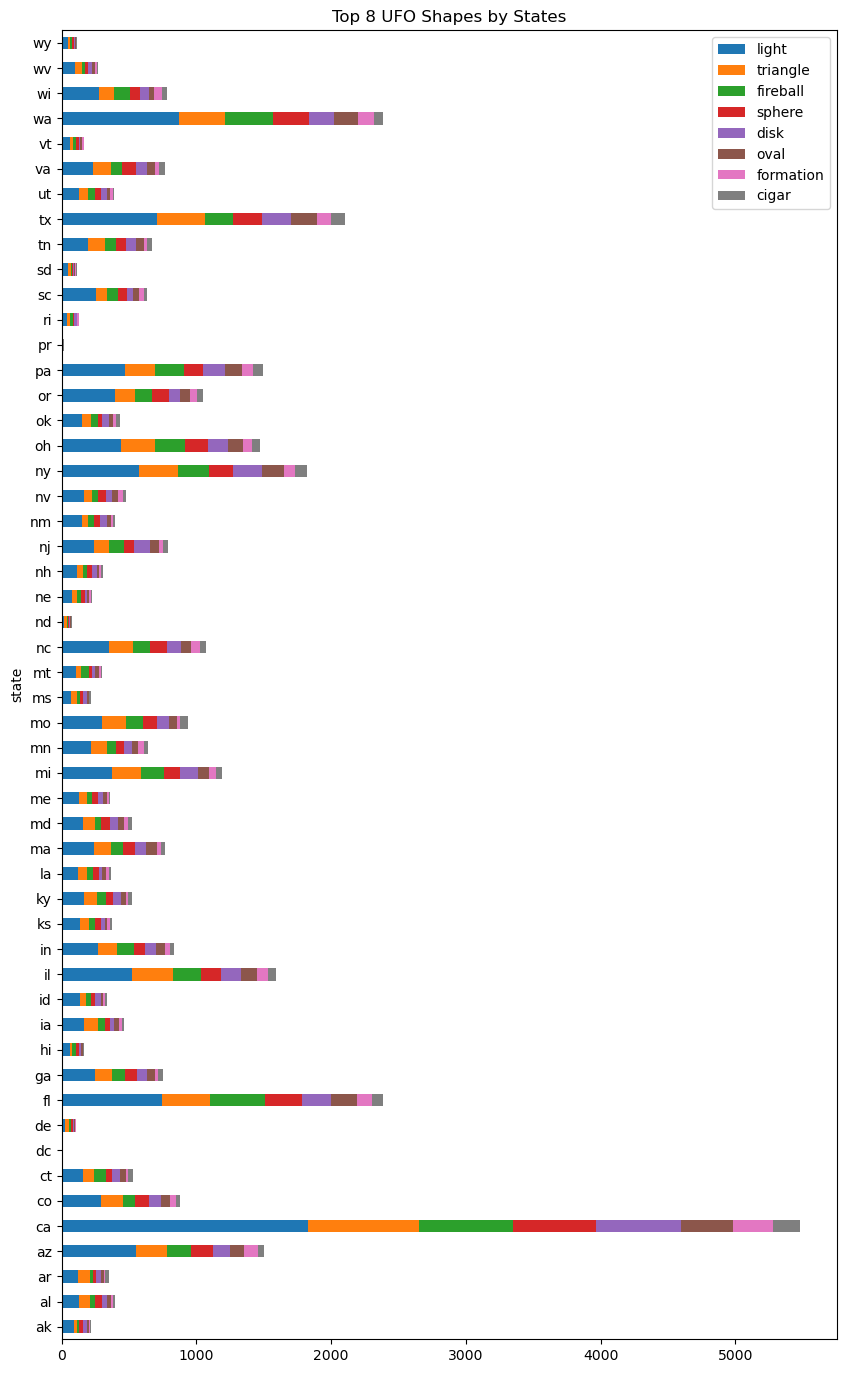

In [67]:
#Create a horizontal stackbar for top 8 shapes by states
shape_us_merge_plot=shape_us_merge.plot(kind="barh",stacked=True,figsize=(10,17))
plt.title("Top 8 UFO Shapes by States")

In [69]:
#Remove NaN values for further data manipulation
ufo["comments"]=ufo["comments"].fillna("")
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [71]:
colors=["green","gold", "blue", "red","orange","yellow","black","pink", "purple","silver","white","grey","beige","violet"]
ufo["color"]=""

for color in colors:
    ufo['color']=ufo.apply(lambda row: row['color'] +" " + color if color in row['comments'].lower() else row["color"], axis=1) 
ufo  

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,color
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,red
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,green orange
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,red
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,gold


In [84]:
colors = ufo.groupby("color")["color"].nunique()
colors

color
                        1
 beige                  1
 black                  1
 black grey             1
 black purple           1
                       ..
 yellow silver          1
 yellow silver white    1
 yellow white           1
 yellow white beige     1
 yellow white grey      1
Name: color, Length: 262, dtype: int64

In [167]:
colorCounts ={"red":0,"yellow":0, "green":0,"orange":0,"yellow":0,"black":0,"pink":0, "purple":0,
             "silver":0,"white":0,"grey":0,"beige":0,"violet":0, "blue":0, "gold":0}
colors=["green","gold", "blue", "red","orange","yellow","black","pink", "purple",\
        "silver","white","grey","beige","violet"]
import json
for index, row in ufo.iterrows():
    for color in colors:
        if color in row["comments"].lower():
            colorCounts[color] = colorCounts[color] + 1

colors_count = pd.DataFrame.from_dict(colorCounts, orient="index")
colors_count.sort_values([0])
colors_count
 

,0
red,15623
yellow,1916
green,3999
orange,8896
black,1952
pink,237
purple,155
silver,1591
white,8004
grey,339


In [176]:
colors_count.columns=["count"]
colors_count.sort_values('count')
colors_count_sorted=colors_count.sort_values('count', ascending=False)
colors_count_sorted

,count
red,15623
orange,8896
white,8004
green,3999
blue,3490
black,1952
yellow,1916
silver,1591
gold,509
grey,339


Text(0.5, 1.0, 'Colors Count')

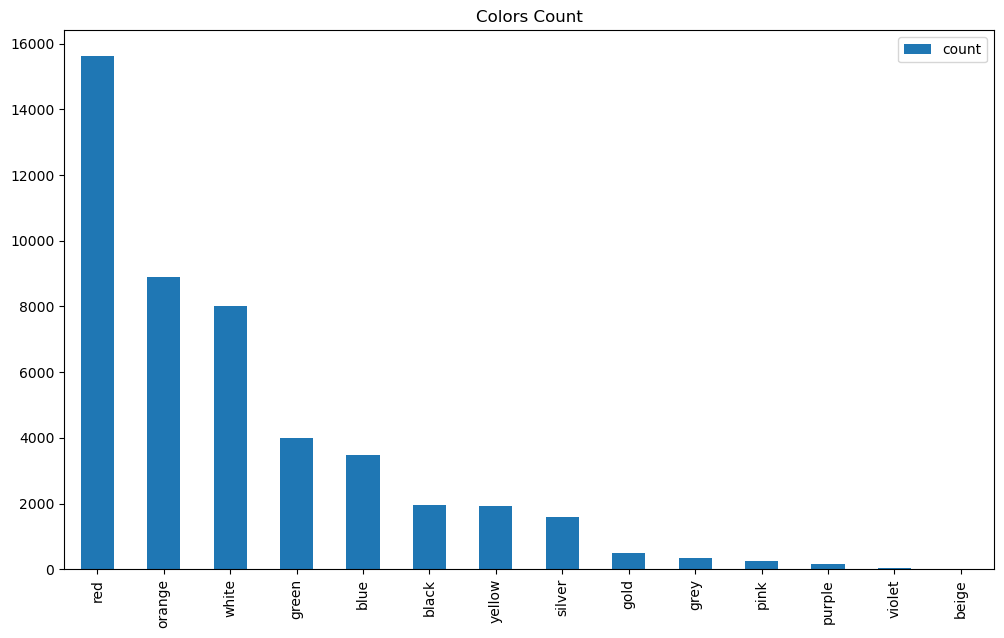

In [177]:
colors_count_plot=colors_count_sorted.plot(kind="bar",figsize=(12,7))
plt.title("Colors Count")